In [4]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [5]:
xls_file = pd.ExcelFile("Data_daily_final.xlsx") # Read Excel
df1=xls_file.parse("WTI") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,CLc1,CLc3,CLc6,CLc9,CLc12
Timestamp,,,,,
1983-03-30,29.40,29.25,28.90,NaN,NaN
1983-03-31,29.27,29.05,28.75,NaN,NaN
1983-04-04,29.44,29.10,28.95,NaN,NaN
1983-04-05,29.71,29.35,29.00,NaN,NaN
1983-04-06,29.90,29.50,29.10,NaN,NaN


<AxesSubplot:xlabel='Timestamp'>

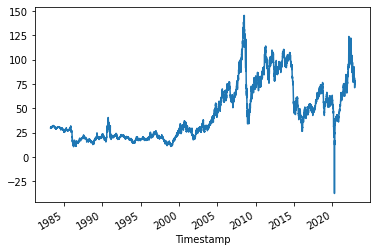

In [6]:
spot = df1["CLc1"]
#spot = np.log(spot).diff()
spot.plot()

In [7]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count    9983.000000
mean       44.952744
std        28.861865
min       -37.630000
25%        20.300000
50%        31.530000
75%        64.495000
max       145.290000
Name: CLc1, dtype: float64

In [53]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()).dropna(), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()).dropna(), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna()).dropna()))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()).dropna(), lags=[6]))

Skewness spot: 0.8599600575333407
Skewness logs: 0.18741696553007323
Kurtosis spot: 2.637196097490023
Kurtosis logs: 1.7358007508932813
JB spot: Jarque_beraResult(statistic=1285.2080398757691, pvalue=0.0)
JB logs: Jarque_beraResult(statistic=723.1543987186772, pvalue=0.0)
Q(6) spot:         lb_stat  lb_pvalue
6  59521.021243        0.0
Q(6) logs:         lb_stat  lb_pvalue
6  59582.091086        0.0


c:\Users\tatuh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tatuh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
#np.log(spot.dropna()).dropna().iloc[:9309]

#np.log(spot.dropna()).to_excel("values.xlsx")
#df1.to_excel("values.xlsx")

Timestamp
1983-03-30    3.380995
1983-03-31    3.376563
1983-04-04    3.382354
1983-04-05    3.391484
1983-04-06    3.397858
                ...   
2020-04-15    2.989211
2020-04-16    2.989211
2020-04-17    2.905260
2020-04-21    2.303585
2020-04-22    2.623218
Name: CLc1, Length: 9309, dtype: float64

In [54]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
print("ADF logs:", adfuller(np.log(spot.dropna()).dropna()))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot.dropna()).dropna()).summary().as_text())



ADF spot: (-2.31358444798749, 0.16762414028850092, 38, 9944, {'1%': -3.4310077824674576, '5%': -2.8618307005419665, '10%': -2.566924734762862}, 34775.44241353123)


c:\Users\tatuh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ADF logs: (-1.9139972757574473, 0.32550527156247777, 32, 9949, {'1%': -3.4310074518049287, '5%': -2.8618305544250604, '10%': -2.566924656984615}, -44457.91323625817)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.030
P-value                         0.273
Lags                               38
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.802
P-value                         0.380
Lags                               38
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


c:\Users\tatuh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot.dropna()).dropna()).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  9.998
P-value                         0.000
Lags                               59
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                 11.566
P-value                         0.000
Lags                               59
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tatuh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


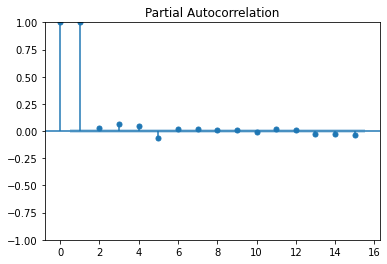

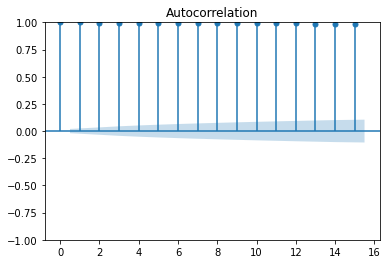

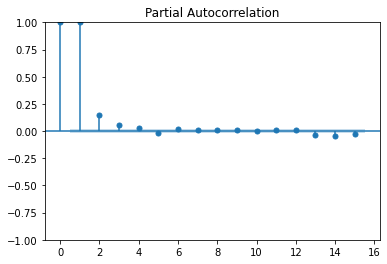

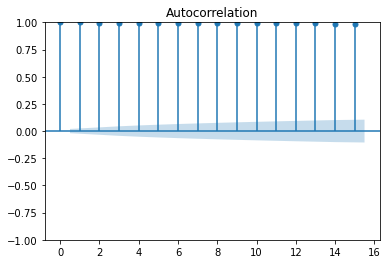

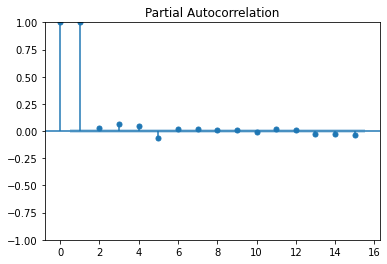

In [52]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()).dropna(), lags = 15)
plot_pacf(np.log(spot.dropna()).dropna(), lags = 15)



0.6782943507735172

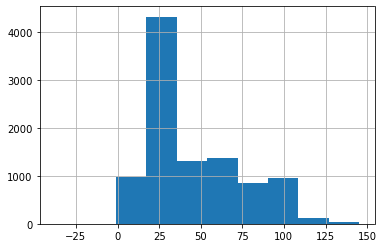

In [13]:
spot.hist()
0.6782943507735172

c:\Users\tatuh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

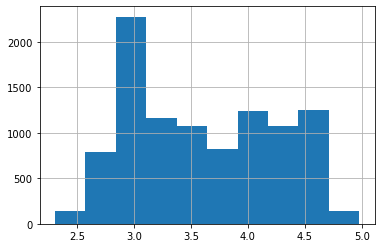

In [14]:
np.log(spot).hist()

In [15]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=6000)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11818.841, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11828.001, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11829.113, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11829.041, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11826.389, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11816.782, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11822.440, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11831.063, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11811.378, Time=0.83 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11809.688, Time=0.78 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=11811.438, Time=0.95 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=11813.385, Time=1.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=11808.175, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11820.875, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0

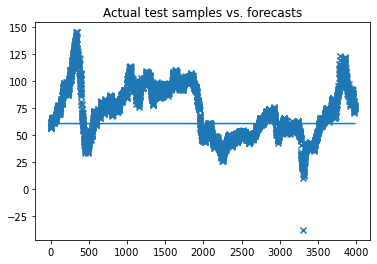

In [16]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [17]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6000
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -5900.088
Date:                Tue, 27 Dec 2022   AIC                          11808.175
Time:                        16:59:03   BIC                          11834.973
Sample:                             0   HQIC                         11817.481
                               - 6000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0138      0.007     -1.905      0.057      -0.028       0.000
ma.L2         -0.0379      0.008     -4.799      0.000      -0.053      -0.022
ma.L3         -0.0514      0.007     -7.861      0.000      -0.064      -0.039
sigma2         0.4186      0.003    153.295      0.000       0.413       0.424
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             72016.07
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                            -0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

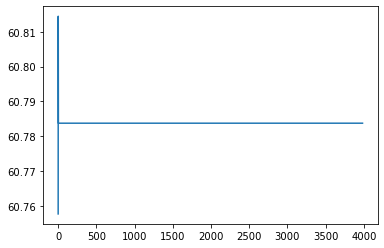

In [18]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [19]:
arima.predict(n_periods=test.shape[0])

array([60.75767034, 60.81444599, 60.78372609, ..., 60.78372609,
       60.78372609, 60.78372609])

<AxesSubplot:xlabel='Timestamp'>

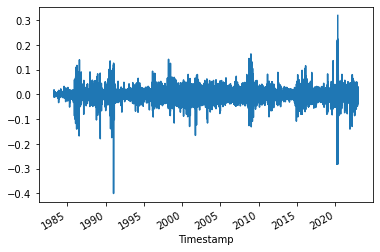

In [55]:
spot2 = np.log(spot).diff()
spot2.plot()

In [56]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    9980.000000
mean        0.000158
std         0.025276
min        -0.400478
25%        -0.010909
50%         0.000522
75%         0.011949
max         0.319634
Name: CLc1, dtype: float64

In [58]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.508961402050704
Kurtosis spot: 22.822040516499747
JB spot: Jarque_beraResult(statistic=163817.31589946727, pvalue=0.0)
Q(6) spot:      lb_stat     lb_pvalue
6  52.204719  1.696150e-09


In [59]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-16.934790434843535, 9.716345624203404e-30, 33, 9946, {'1%': -3.431007650162541, '5%': -2.8618306420775723, '10%': -2.566924703642177}, -44937.42818122359)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic               -100.781
P-value                         0.000
Lags                               38
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [60]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.082
P-value                         0.681
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


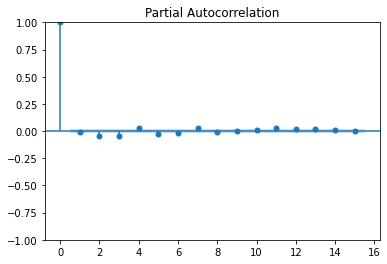

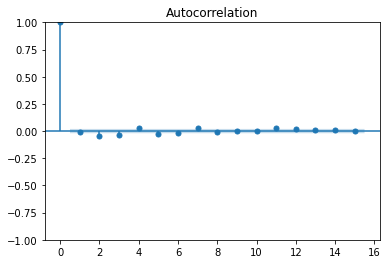

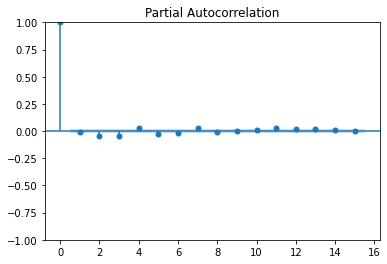

In [61]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

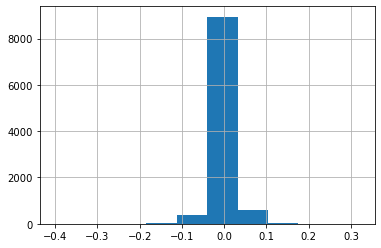

In [62]:
spot2.hist()


In [63]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=6000)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-27972.324, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-27957.936, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-27955.946, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-27955.906, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-27972.770, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-27971.593, Time=0.55 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-27960.515, Time=0.31 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-27988.917, Time=0.94 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-27987.199, Time=0.79 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-27986.645, Time=0.52 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-27985.673, Time=0.56 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-27988.490, Time=0.45 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-27988.026, Time=0.82 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-27987.124, Time=0.76 sec

Best

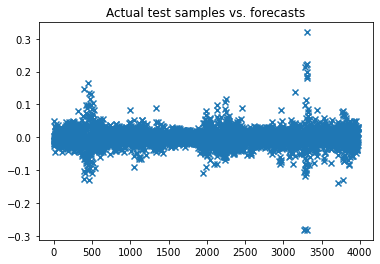

In [64]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [65]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6000
Model:               SARIMAX(1, 0, 3)   Log Likelihood               13999.458
Date:                Tue, 27 Dec 2022   AIC                         -27988.917
Time:                        17:53:49   BIC                         -27955.419
Sample:                             0   HQIC                        -27977.284
                               - 6000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2498      0.139     -1.794      0.073      -0.523       0.023
ma.L1          0.2493      0.140      1.783      0.075      -0.025       0.523
ma.L2         -0.0568      0.008     -7.052      0.000      -0.073      -0.041
ma.L3         -0.0675      0.010     -7.090      0.000      -0.086      -0.049
sigma2         0.0006   3.49e-06    157.702      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             91626.37
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

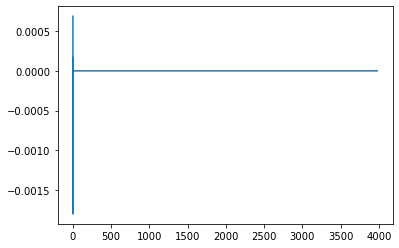

In [32]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [33]:
arima2.predict(n_periods=test2.shape[0])

array([ 0.00068708, -0.00180018, -0.00067711, ...,  0.        ,
        0.        ,  0.        ])

In [34]:
#cointegration tests

#normalized cv
#LR test

In [ ]:
#correlaatiomatriisi

In [ ]:
#np.argwhere(np.isnan(x))